# Huggingface Audio Dataset

In [1]:
from datasets import load_dataset
import gradio as gr
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Dataset (Minds14)


[MINDS-14](https://huggingface.co/datasets/PolyAI/minds14) contains recordings of people asking an e-banking system questions in several languages and dialects. The dataset contains 654 audio files, each of which is accompanied by a transcription, an English translation, and a label indicating the intent behind the person’s query. The audio column contains the raw audio data. 

## Load the EN-AU subset of the data

In [2]:
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")

# The lang_id is the same (for EN-AU) for all examples. The english_transcription duplicate the transcription 
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)

minds

/home/eml/venv/ml/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

## Labels

In [3]:
print(minds.features["intent_class"])

ClassLabel(names=['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill'], id=None)


## Utility

In [4]:
id2label = minds.features["intent_class"].int2str

---
# Example Record

In [5]:
example = minds[0]
example

{'path': '/home/eml/.cache/huggingface/datasets/downloads/extracted/8b2f5b596435dc9607ef03217cdf9a387a9107d462ddb8c450ee1b6ee9295c41/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/home/eml/.cache/huggingface/datasets/downloads/extracted/8b2f5b596435dc9607ef03217cdf9a387a9107d462ddb8c450ee1b6ee9295c41/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13}

In [6]:
id2label(example["intent_class"])

'pay_bill'

## Wave

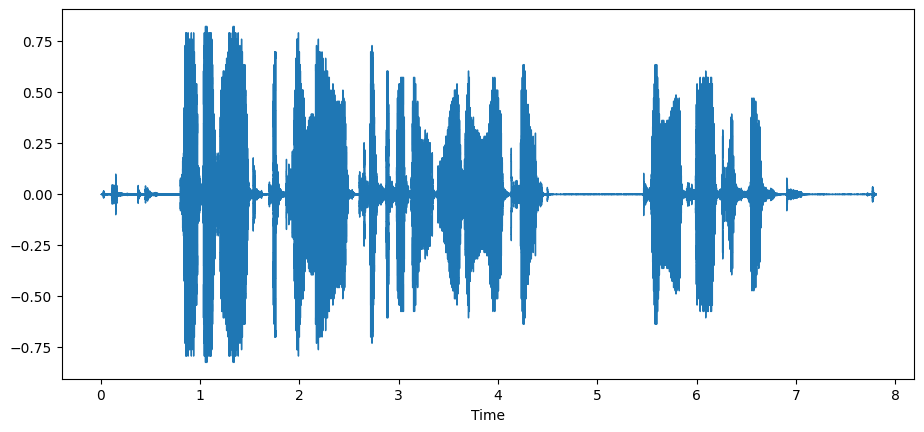

In [12]:
plt.figure().set_figwidth(11)
librosa.display.waveshow(data, sr=sampling_rate)

## Mel Log Spectrogram

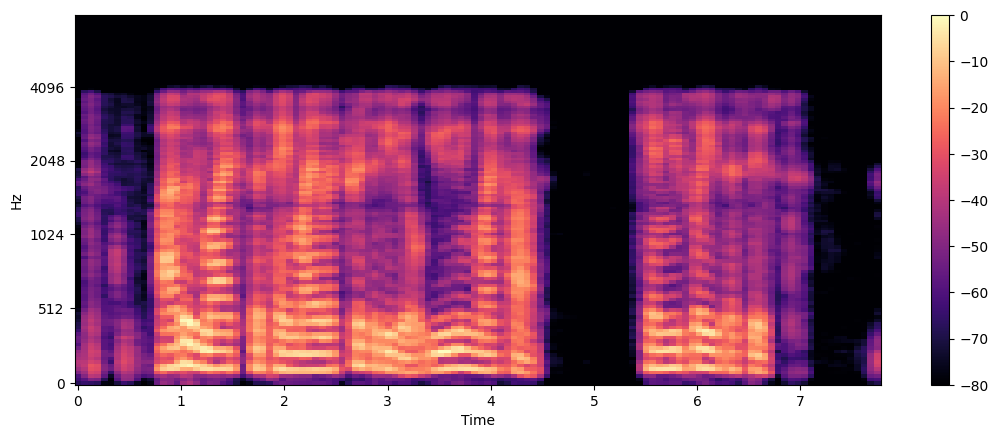

In [13]:
S = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(13)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

## Play with Gradio Audio

* [gradio Audio](https://www.gradio.app/docs/gradio/audio#audio)

> Creates an audio component that can be used to upload/record audio (as an input) or display audio (as an output).

### As output component: 

> expects audio data in any of these formats:  
>
> * filepath or URL to an audio file, or
> * a bytes object (recommended for streaming), or
> * a tuple of (sample rate in Hz, audio data as numpy array).
>   Note: if audio is supplied as a numpy array, the audio will be normalized by its peak value to avoid distortion or clipping in the resulting audio.


In [7]:
data = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
label = id2label(example["intent_class"])

In [8]:
with gr.Blocks() as demo:
    with gr.Column():
        output = gr.Audio(value=(sampling_rate, data), label=label)

demo.launch(debug=True)

/home/eml/venv/ml/lib/python3.10/site-packages/gradio/processing_utils.py:574: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
